# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy 

In [2]:
path=r'/Users/s.cheriyanath/sruthy/notebook'

# Importing Dataset

In [3]:
df_combined=pd.read_pickle(os.path.join(path,'prepared data','df_combined.pkl'))

In [4]:
df_combined.shape

(32404859, 31)

In [6]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 31 columns):
 #   Column                     Dtype   
---  ------                     -----   
 0   order_id                   int32   
 1   user_id                    int32   
 2   order_number               int8    
 3   order_day_of_week          int8    
 4   order_hour_of_day          int8    
 5   days_since_previous_order  float16 
 6   product_id                 int32   
 7   add_to_cart_order          int32   
 8   reordered                  int8    
 9   product_name               object  
 10  aisle_id                   int8    
 11  department_id              int8    
 12  prices                     float64 
 13  _merge                     category
 14  price_label                object  
 15  busiest day                object  
 16  busiest_days               object  
 17  busiest_period_of_day      object  
 18  max_order                  int8    
 19  Loyalty_Flag       

# Visualizations

# Histogram

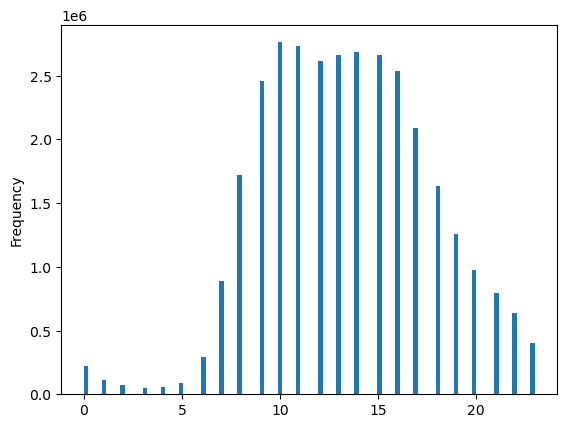

In [42]:
Hist=df_combined['order_hour_of_day'].plot.hist(bins=100)

# Observation: Most orders are between 9 am to 5 pm

In [8]:
df_combined['order_hour_of_day'].value_counts(dropna=False)

10    2761760
11    2736140
14    2689136
15    2662144
13    2660954
12    2618532
16    2535202
9     2454203
17    2087654
8     1718118
18    1636502
19    1258305
20     976156
7      891054
21     795637
22     634225
23     402316
6      290493
0      218769
1      115700
5       87961
2       69375
4       53242
3       51281
Name: order_hour_of_day, dtype: int64

# Bar Chart for 'Loyalty Flag' column

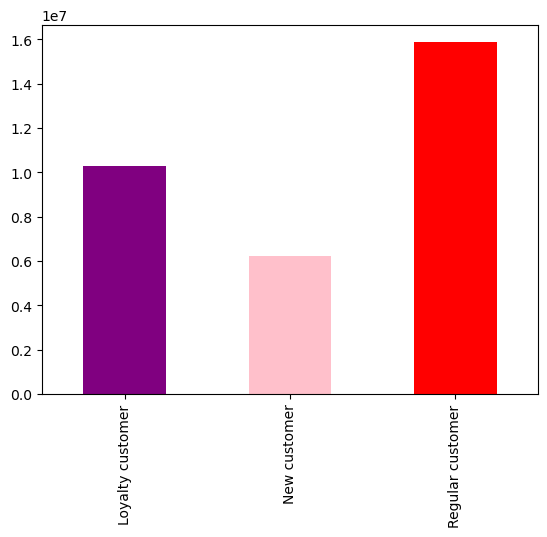

In [43]:
Bar=df_combined['Loyalty_Flag'].value_counts().sort_index().plot.bar(color=['purple','pink','red'])

In [13]:
df_combined['Loyalty_Flag'].value_counts()

Regular customer    15876776
Loyalty customer    10284093
New customer         6243990
Name: Loyalty_Flag, dtype: int64

# Create a sample

In [14]:
# create a list
dev=np.random.rand(len(df_combined))<=0.7

In [15]:
# store 70% of sample in the dataframe Big
Big=df_combined[dev]

In [16]:
# store 30% of sample in the dataframe Small
Small=df_combined[~dev]

In [18]:
len(df_combined)

32404859

In [19]:
len(Big)+len(Small)

32404859

# Line chart

In [21]:
#New Dataframe without unnecessary columns
df_line=Small[['order_hour_of_day','prices']]

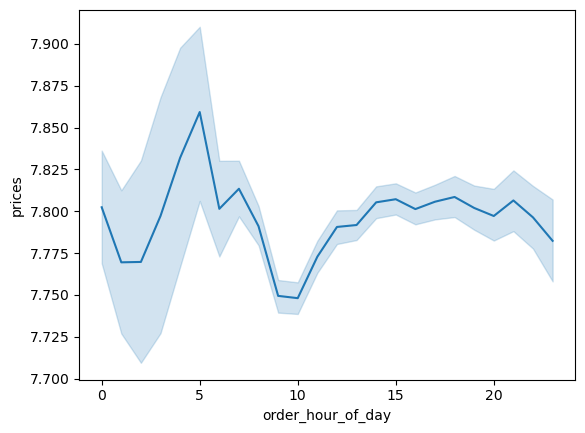

In [23]:
# line chart for 'prices' and 'order_hour_of_day' columns
line=sns.lineplot(data=df_line,x='order_hour_of_day',y='prices')

# Customer demographics

In [26]:
#New Dataframe without unnecessary columns
df_demo=Small[['Age','No_of_Dependants']]

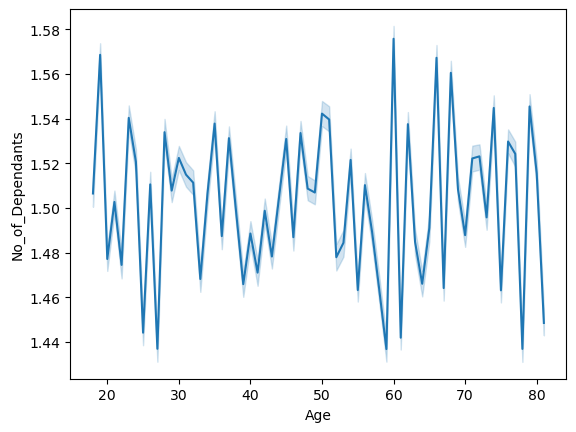

In [27]:
# line chart for 'Age' and 'No_of_Dependants' columns
Demo=sns.lineplot(data=df_demo,x='Age',y='No_of_Dependants')

# The no of dependants are almost same for all age categories

In [36]:
pd.options.display.max_rows = None

In [37]:
df_demo[['Age','No_of_Dependants']].groupby(['Age','No_of_Dependants']).value_counts()

Age  No_of_Dependants
18   0                   37508
     1                   38822
     2                   34737
     3                   39518
19   0                   33109
     1                   41571
     2                   40443
     3                   40600
20   0                   37465
     1                   39687
     2                   36839
     3                   36126
21   0                   36935
     1                   39745
     2                   39996
     3                   37126
22   0                   40109
     1                   39212
     2                   35871
     3                   38607
23   0                   38057
     1                   36940
     2                   37784
     3                   41934
24   0                   35226
     1                   41417
     2                   37250
     3                   38711
25   0                   40260
     1                   32780
     2                   34696
     3           

# Scatterplot--age and spending power (income)

In [39]:
# new dataframe without unnecessary columns

df_scatter = Small[['Income','Age']]

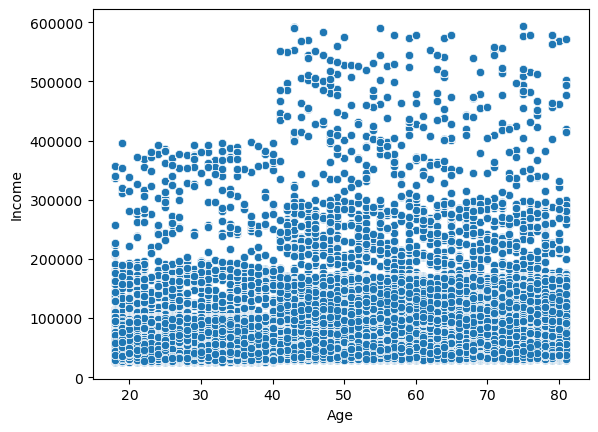

In [49]:
scatter=sns.scatterplot(x='Age',y='Income',data=df_scatter)

# The majority of customer have less than 200000 income, and the income rises with the age. An income above 200000 is  more for customers over age of 40 

# Export Visualization

In [44]:
# exporting histogram

Hist.figure.savefig(os.path.join(path,'Analysis','Visualization','hist_order_hour.png'))

In [45]:
# exporting Barchart

Bar.figure.savefig(os.path.join(path,'Analysis','Visualization','Bar_Loyalty_Flag.png'))

In [46]:
# exporting Linechart-'order_hour_of_day' & 'prices'

line.figure.savefig(os.path.join(path,'Analysis','Visualization','Line_prices_Hour.png'))

In [48]:
# exporting Linechart-'Age'& 'No_of_Dependants'
Demo.figure.savefig(os.path.join(path,'Analysis','Visualization','Line_age_dependants.png'))

In [50]:
# exporting Scatterplot-'Age'& 'Income'
scatter.figure.savefig(os.path.join(path,'Analysis','Visualization','scatter_age_income.png'))